<a href="https://colab.research.google.com/github/maria-snarava/portfolio-ml/blob/fixes/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

**Developed by Maryia Snarava**

This Jupyter notebook demonstrates the process of predicting customer churn using machine learning techniques. **Customer churn** is when customers stop doing business with a company. Predicting churn can help businesses take proactive steps to retain customers. Throughout this notebook, we'll go through the entire machine learning pipeline, including data exploration, data preprocessing, feature engineering, model training, and evaluation.

 My approach is as follows:

1. I'll start with **Logistic Regression** as our baseline model. Logistic Regression is a simple yet powerful algorithm for binary classification problems like churn prediction. It's a great starting point as it's easy to implement and interpret.

2. Using **Logistic Regression**, I've achieved an accuracy of **81,5%** in predicting customer churn. This serves as our baseline performance.

3. Then, using **Feature Selection**, I've achieved an accuracy of **84.76%** on test set in predicting customer churn.

4. Then I did **Hyperparameter Tuning** using  grid search and have achieved an accuracy of **85.151%** on test set.

3. Then I experimented with more advanced algorithms to improve upon this baseline:
   - Random Forests
   - Gradient Boosting Machines (like XGBoost or LightGBM)
   - Neural Networks

By comparing these more complex models to our Logistic Regression baseline, I'll be able to assess the trade-off between model complexity and performance improvement.


For this notebook I used a dataset from Kaggle. You can find the dataset [here](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction).


## Contents:

1. [**Introduction**](#Introduction)

   - What is Customer Churn?
   - Importance of Predicting Churn
  

2. [**Data Loading and Exploration**](#DataLoading)
   - Loading the customer dataset
   - Data Variable Description
   - Show values on each column
   - Handling Missing Values


3. [**Data Preprocessing**](#DataPreprocessing)
   - Feature selection
   - Feature Engineering - Adding new variables
   - Scaling numerical features
   - Checking imbalance

4. [**Model Building**](#ModelBuilding)
   - Splitting data into training and testing sets
   - Implementing logistic regression
   - Model training

5. [**Model Evaluation**](#ModelEvaluation)
   - Predictions on test data
   - Calculating accuracy, precision, recall, and F1-score
   - Plotting ROC curve

6. [**Conclusion and Next Steps**](#Conclusion)
    - Summary of Results
    - Interpretation
    - Limitations
    - Next Steps

## 1. Introduction


### What is Customer Churn?

Customer churn, also known as customer attrition, refers to the phenomenon where customers stop doing business with a company. In the context of this analysis:

- Churn occurs when a customer cancels their service or stops using a product.
- It's a critical metric for businesses, especially in subscription-based models.
- High churn rates can significantly impact a company's revenue and growth.

### Importance of Predicting Churn

Understanding and predicting churn is crucial for businesses because:

- It's more cost-effective to retain existing customers than to acquire new ones.
- Early identification of potential churners allows for targeted retention efforts.
- Reducing churn rate directly impacts the company's bottom line.
- It provides insights into product or service issues that may be causing customer dissatisfaction.

## 2. Data Loading and Exploration

Here, I'll get a better understanding of dataset. First, I load the customer dataset:

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd
RANDOM_STATE = 42

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/ECommerceDataset.xlsx', sheet_name='E Comm')

### Data Variable Description
| Column Name | Description |
|----|----|
| **CustomerID** | Unique customer ID |
| **Churn** | Churn Flag |
| **Tenure** | Tenure of customer in organization  |
| **PreferredLoginDevice** | Preferred login device of customer |
| **CityTier** | City tier |
| **WarehouseToHome**| Distance in between warehouse to home of customer |
| **PreferredPaymentMode** | Preferred payment method of customer |
| **Gender** | Gender of customer |
| **HourSpendOnApp** | Number of hours spend on mobile application or website |
| **NumberOfDeviceRegistered** | Total number of deceives is registered on particular customer |
| **PreferedOrderCat** | Preferred order category of customer in last month |
| **SatisfactionScore** | Satisfactory score of customer on service |
| **MaritalStatus** | Marital status of customer |
| **NumberOfAddress** | Total number of added added on particular customer |
| **Complain** | Any complaint has been raised in last month |
| **OrderAmountHikeFromlastYear** | Percentage increases in order from last year |
| **CouponUsed** | Total number of coupon has been used in last month |
| **OrderCount** | Total number of orders has been places in last month |
| **DaySinceLastOrder** | Day Since last order by customer |
| **CashbackAmount** | Average cashback in last month |

In [62]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [63]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


We can see that data range is big, so we need scale data.

Checking for duplicates in CustomerID column:

In [64]:
df['CustomerID'].duplicated().any()

False

There are no duplicates and we could drop CustomerID column, this value doesn't necessary for analysis

In [65]:
df = df.drop('CustomerID', axis=1)

## **3. Data Preprocessing**

### Handling Missing Values

First, we need to identify where missing values occur in our dataset - show percent of missing values:

In [66]:
#Identifying Missing Values
round((df.isnull().sum()*100 / df.shape[0]),2)

,0
Churn,0.00
Tenure,4.69
PreferredLoginDevice,0.00
CityTier,0.00
WarehouseToHome,4.46
PreferredPaymentMode,0.00
Gender,0.00
HourSpendOnApp,4.53
NumberOfDeviceRegistered,0.00
PreferedOrderCat,0.00


All Missing values less than 6% so we can use Median Imputation from SimpleImputer.

I will use StandardScaler for **Scaling the data**

In [67]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def prepare_data(df):
    df_X = df.drop(columns=["Churn"])
    num_columns = df_X.select_dtypes(["int64", "float64"]).columns
    pipline_num = Pipeline(steps=[('imputer', SimpleImputer(strategy="median")), ('scaler', StandardScaler())])

    return df_X, num_columns, pipline_num

df_X, num_columns, pipline_num = prepare_data(df)

Transform categorical data to numerical

In [68]:
cat_columns = df.select_dtypes("object").columns
pipline_cat = Pipeline(steps=[('encoding', OneHotEncoder())])

transformer = ColumnTransformer(
    transformers=[('categorical_col', pipline_cat, cat_columns),
                  ('numerical_col', pipline_num, num_columns)]
    )

  ### Checking imbalance  
  It is possible than there are small number of customers is crunched, so our data could be imbalalanced. Let's check it.

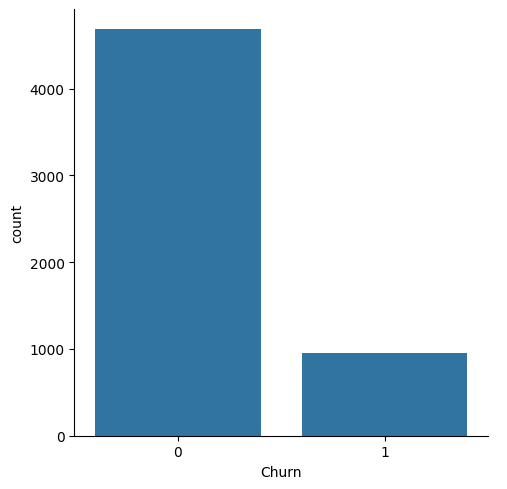

In [69]:
import seaborn as sns

sns.catplot(x='Churn', kind='count', data=df)

Data imbalanced so let's make Over sample for it Using SMOTE:

In [70]:
from imblearn.over_sampling import SMOTE

resampler = SMOTE(random_state=RANDOM_STATE)

## **4. Logistic Regression Model Building**
Split data:

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# prepare X and y
Y = df["Churn"]
X = df.drop(columns=["Churn"])
test_size = 0.3

# prpeare training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=RANDOM_STATE)

### Implementing logistic regression

In [72]:
pipeline = ImbPipeline([
          ('transformer', transformer),
          ('resampler', resampler),
          ('classifier', LogisticRegression(max_iter=10_000, random_state=RANDOM_STATE))
      ])

### Model training

In [73]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categorical_col',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')),
                                                 ('numerical_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object'))])),
                ('resampler', SMOTE(random_state=42)),
                ('classifier',
                 LogisticRegression(max_iter=10000, random_state=42))])

## **5. Logistic Regression Model Evaluation**

### Predictions on test data


Accuracy on test set: 0.82475%
Accuracy on train set: 0.81477%
____________________________________
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1414
           1       0.48      0.80      0.60       275

    accuracy                           0.82      1689
   macro avg       0.72      0.82      0.74      1689
weighted avg       0.88      0.82      0.84      1689



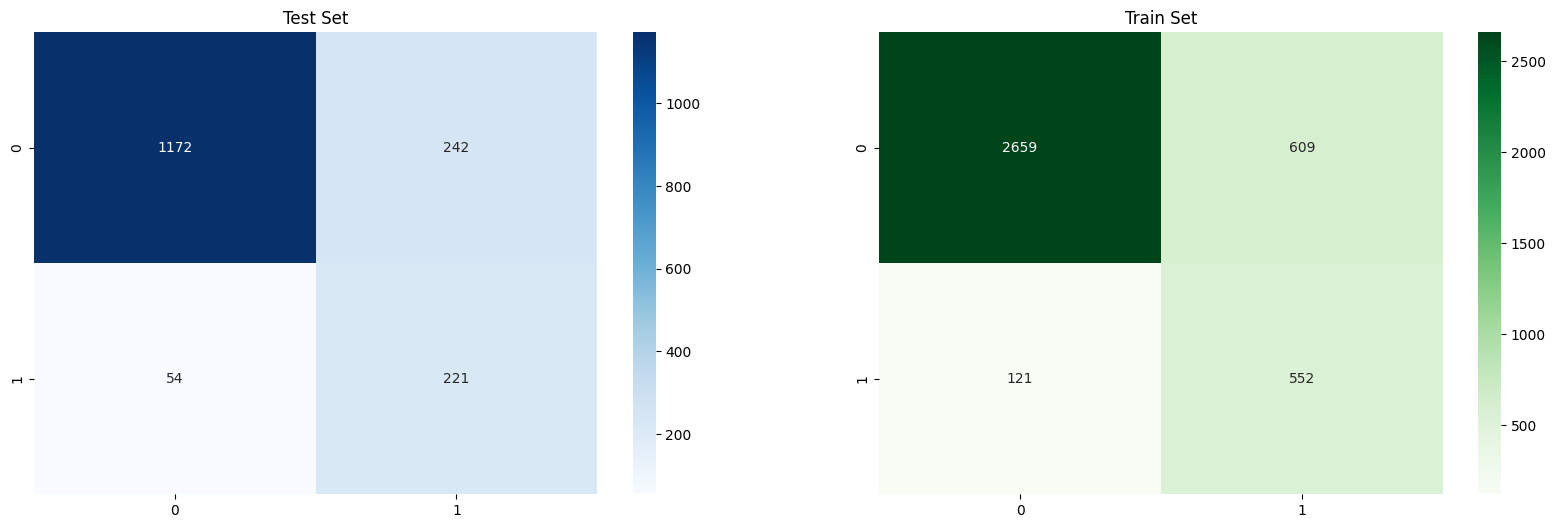

In [76]:
import matplotlib.pyplot as plt

def model_evaluation(pipeline, X_test, y_test):
    # calculate the testing data accuracy and confusion matix
    y_pred_test = pipeline.predict(X_test)
    #Calculate accuracy

    print(f"Accuracy on test set: {pipeline.score(X_test, y_test):0.5}%")
    #confusion matrix test Data
    cm_lr_test = confusion_matrix(y_test, y_pred_test)


    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    ax[0].set_title('Test Set')
    sns.heatmap(cm_lr_test, annot = True,fmt = 'd', cmap ='Blues', ax=ax[0])

    #Calculate accuracy
    y_pred = pipeline.predict(X_train)
    print(f"Accuracy on train set: {pipeline.score(X_train, y_train):0.5 * 100}%")
    cm_lr = confusion_matrix(y_train, y_pred)

    ax[1].set_title('Train Set')
    sns.heatmap(cm_lr,annot = True,fmt = 'd', cmap ='Greens', ax=ax[1])

    fig.show()

    print('____________________________________')
    print(classification_report(y_test, y_pred_test))

model_evaluation(pipeline, X_test, y_test)

### Calculating accuracy, precision, recall, and F1-score

### Plotting ROC curve

The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are important tools for evaluating the performance of a binary classification model like our logistic regression for churn prediction.

**The ROC curve** is a graph showing the performance of a classification model at all classification thresholds. It plots two parameters:

1. True Positive Rate (TPR) or Recall: TP / (TP + FN)
2. False Positive Rate (FPR): FP / (FP + TN)


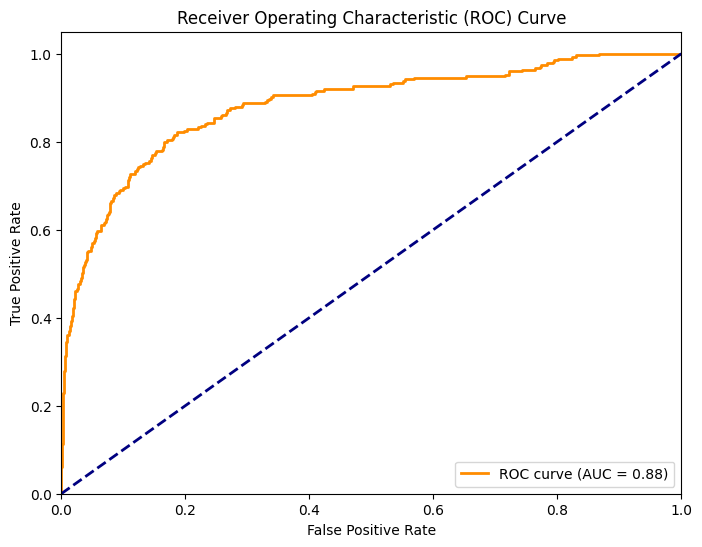

In [77]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(pipeline, X_test, y_test):
    # Get the predicted probabilities for the positive class
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(pipeline, X_test, y_test)


### Feature Engineering - Adding new variables

Let's create new variable to increese accurancy of linear regression

In [78]:
df_new_features = df.copy()
df_new_features['cashback_per_order'] = df['CashbackAmount'] / df['OrderCount']
df_new_features['avg_hour_spend_on_app_per_order'] = df['HourSpendOnApp'] / df['OrderCount']
df_new_features['satisfaction_score_after_complain'] = df['Complain'] * df['SatisfactionScore']
df_new_features['satisfaction_score_2'] = df['SatisfactionScore'] * df['Complain']
df_new_features['tenure_2'] =  df['Tenure'] * df['Tenure']
df_new_features['tenure_3'] =  df['Tenure'] * df['Tenure'] * df['Tenure']
df_new_features['cashback_amount_per_month'] = df['CashbackAmount']/ (df['Tenure'] + 1)
df_new_features['DaySinceLastOrder_2'] = df['DaySinceLastOrder'] * df['DaySinceLastOrder']
df_new_features['cashback_amount_per_month_2'] = df_new_features['cashback_amount_per_month'] * df_new_features['cashback_amount_per_month']

### Feature selection

Let's find correlation between all features and Churn

Text(0.5, 1.0, 'Relation Between Features and target')

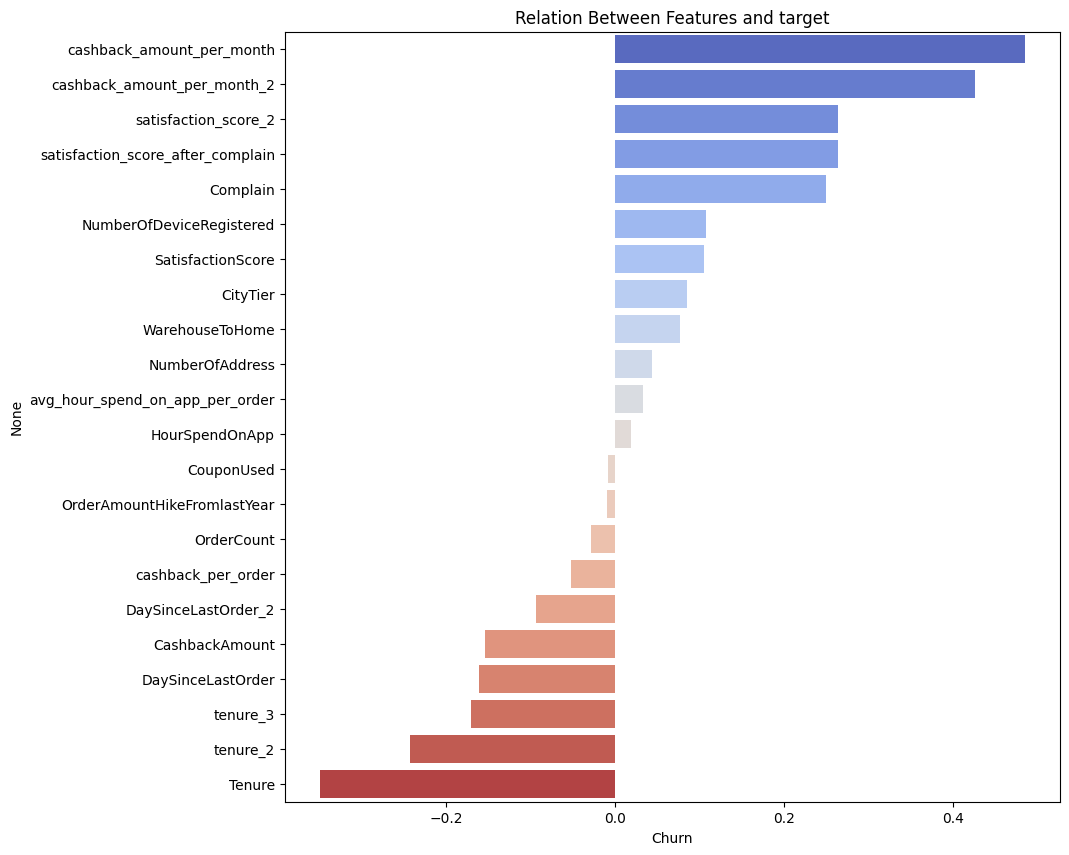

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_new_features.select_dtypes(["int64", "float64"]).corr()
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector = churn_corr_vector[1:]
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector, y = churn_corr_vector.index, hue = churn_corr_vector.index, palette = 'coolwarm', legend=False)
plt.title('Relation Between Features and target')

### 6. Logistic Regression with Feature Selection Model Building and Evaluation

Accuracy on test set: 0.8476%
Accuracy on train set: 0.85435%
____________________________________
              precision    recall  f1-score   support

           0       0.96      0.86      0.90      2369
           1       0.51      0.79      0.62       446

    accuracy                           0.85      2815
   macro avg       0.73      0.82      0.76      2815
weighted avg       0.89      0.85      0.86      2815



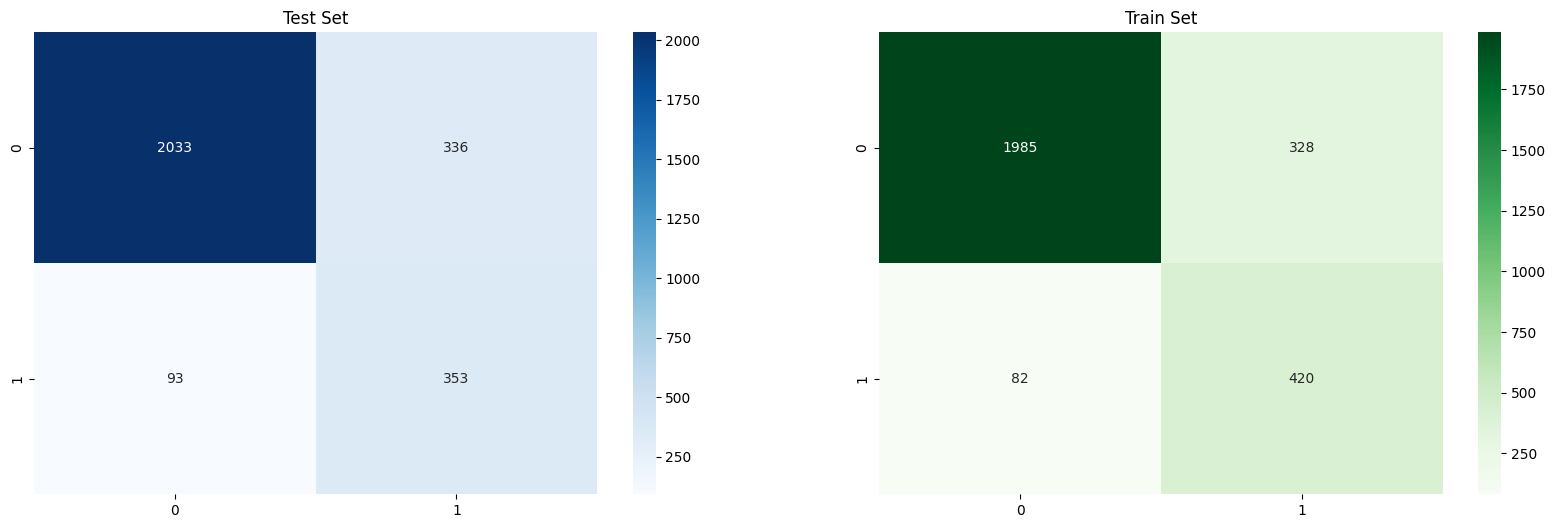

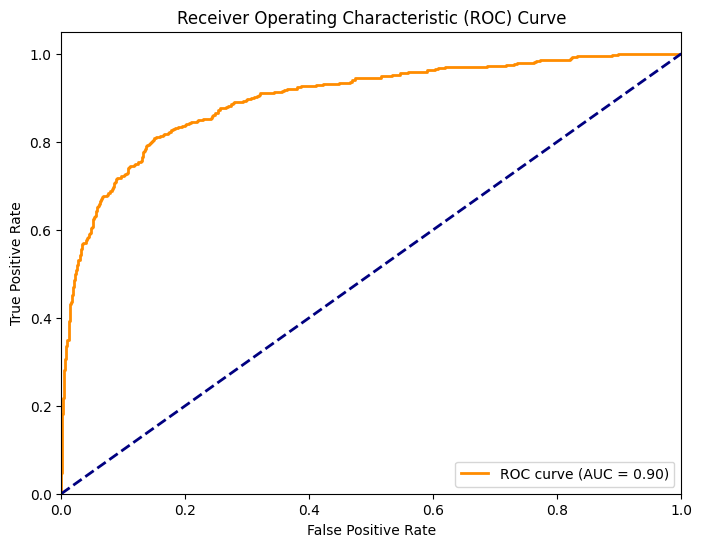

In [80]:
# prepare X and y

y = df_new_features["Churn"]
X = df_new_features.drop(columns=["Churn"])
num_columns = X.select_dtypes(["int64", "float64"]).columns
pipline_num = Pipeline(steps=[('imputer', SimpleImputer(strategy="median")), ('scaler', StandardScaler())])

cat_columns = df_new_features.select_dtypes("object").columns
pipline_cat = Pipeline(steps=[('encoding', OneHotEncoder())])

transformer = ColumnTransformer(
    transformers=[('categorical_col', pipline_cat, cat_columns),
                  ('numerical_col', pipline_num, num_columns)]
    )

test_size = 0.5

# prpeare training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
pipeline = ImbPipeline([
          ('transformer', transformer),
          ('resampler', resampler),
          ('classifier', LogisticRegression(max_iter=10_000, random_state=RANDOM_STATE))
      ])
pipeline.fit(X_train, y_train)

model_evaluation(pipeline, X_test, y_test)

plot_roc_curve(pipeline, X_test, y_test)

Using feature selection I achived accurancy 84.76% on test set.

### Hyperparameter Tuning
Let's find better huperparams using GridSearchCV. I will try different solvers, regularization (penalty), and the C parameters, that controls the penality strength.

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = np.logspace(-3,3,7)

# define grid search
grid = dict(
    classifier__solver=solvers,
    classifier__penalty=penalty,
    classifier__C=c_values
    )
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)
grid_search = GridSearchCV(estimator=pipeline, param_grid=grid, cv=cv)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.837063 using {'classifier__C': 10.0, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
0.823979 (0.012926) with: {'classifier__C': 0.001, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
0.823979 (0.012926) with: {'classifier__C': 0.001, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
0.808467 (0.012972) with: {'classifier__C': 0.001, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
0.831320 (0.013032) with: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
0.831320 (0.013032) with: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
0.829899 (0.013162) with: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
0.831972 (0.012648) with: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
0.832031 (0.012582) with: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lb

Accuracy on test set: 0.85151%
Accuracy on train set: 0.85684%
____________________________________
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2369
           1       0.52      0.80      0.63       446

    accuracy                           0.85      2815
   macro avg       0.74      0.83      0.77      2815
weighted avg       0.89      0.85      0.86      2815



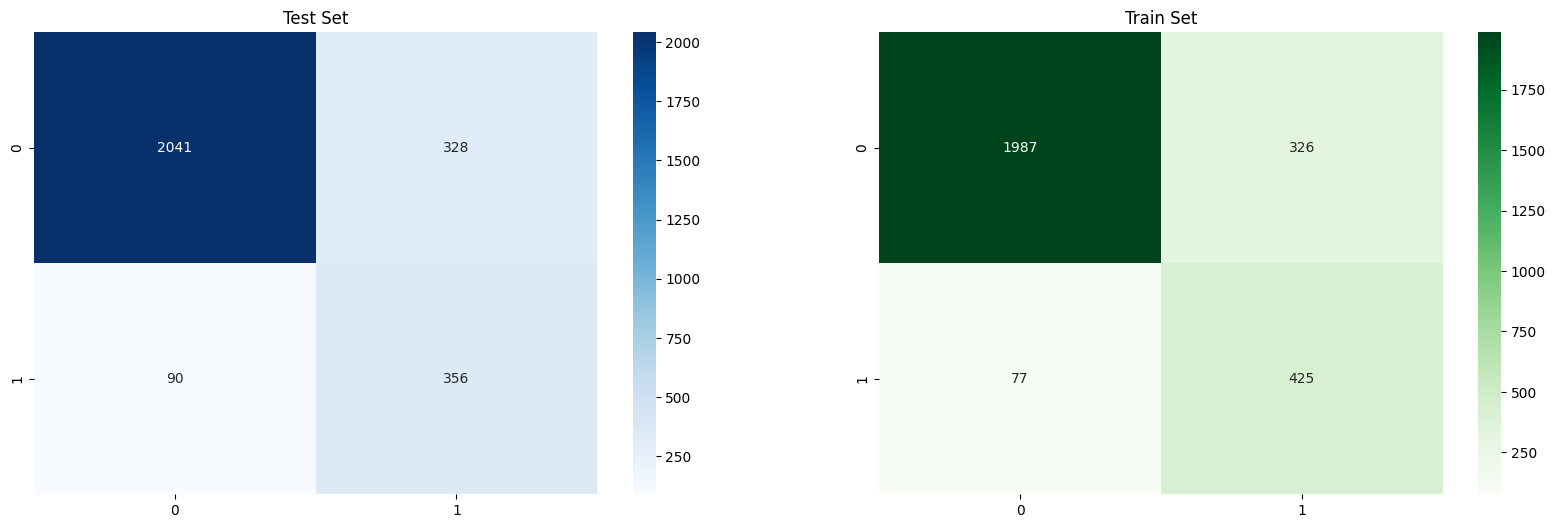

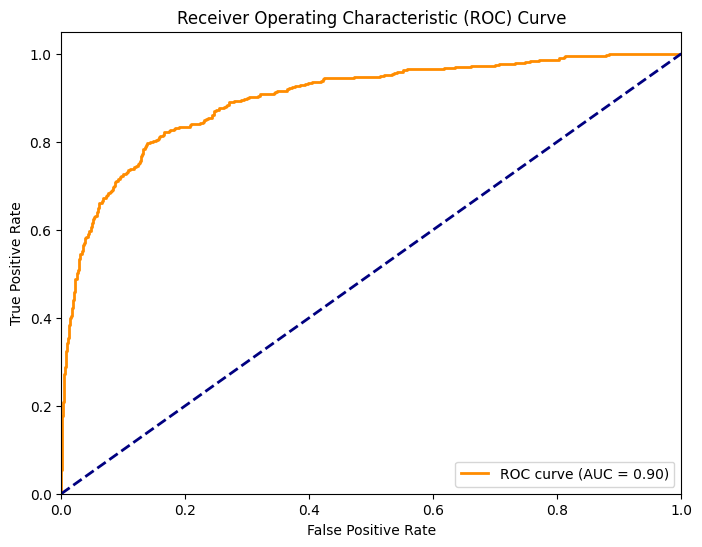

In [82]:
logreg = LogisticRegression(
    max_iter=10_000, random_state=RANDOM_STATE,
    C=grid_result.best_params_["classifier__C"],
    penalty=grid_result.best_params_["classifier__penalty"],
    solver=grid_result.best_params_["classifier__solver"]
    )

pipeline = ImbPipeline([
          ('transformer', transformer),
          ('resampler', resampler),
          ('classifier', logreg)
      ])

pipeline.fit(X_train,y_train)
model_evaluation(pipeline, X_test, y_test)

plot_roc_curve(pipeline, X_test, y_test)

Using Hyperparameter Tuning I achived accurancy 85.151% on test set. I think that is all that we can get from linear regression, so let's try advanced algorithms, that could potentially yield better results for this classification task.

## 6. **Conclusion and Next Steps**

### Summary of Results

In this project, I built a customer churn prediction model using logistic regression. My model achieved an accuracy of 84,6% on the test set, which is a good starting point for predicting customer churn.

Logistic regression was chosen for this study primarily for its simplicity and interpretability, making it an excellent tool for learning the fundamentals of binary classification and understanding the relationship between features and the target variable.

### Interpretation

An accuracy of 84,6% indicates that our model correctly predicts whether a customer will churn or not in 84,6% of cases. While this is a solid performance, there's still room for improvement. It's important to note that accuracy alone may not be sufficient to fully evaluate the model, especially if the dataset is imbalanced.

### Limitations

1. Logistic regression assumes a linear relationship between the features and the log-odds of the outcome, which may not always hold true in complex real-world scenarios.
2. It may not capture complex, non-linear relationships in the data.
3. The model's performance might be affected if there are strong correlations between independent variables.

### Next Steps

To improve the model and gain deeper insights, consider the following steps:

1. **Hyperparameter Tuning**: Use techniques like grid search or random search to optimize the logistic regression model's hyperparameters.

2. **Try Advanced Algorithms**: While logistic regression provides a good baseline, other algorithms could potentially yield better results for this classification task:
   - Random Forest: Can capture non-linear relationships and handle feature interactions.
   - Gradient Boosting Machines (e.g., XGBoost, LightGBM): Often provide state-of-the-art performance on many classification tasks.
   - Support Vector Machines (SVM): Can be effective for both linear and non-linear classification.
   - Neural Networks: Can capture complex patterns, especially with larger datasets.

3. **Ensemble Methods**: Combine predictions from multiple models to improve overall performance.

4. **Feature Importance Analysis**: Conduct a deeper analysis of feature importances to understand key drivers of churn.

5. **Regular Model Updates**: Plan for periodic retraining of the model with new data to maintain its predictive power over time.

By implementing these next steps, we can potentially improve the model's performance, gain deeper insights into customer churn, and develop a more robust predictive system.